# Construcción de modelos de aprendizaje de máquina con `scikit-learn`

Esta biblioteca permite dar uniformidad a la creación de modelos de aprendizaje supervisados y no supervisados. A continuación daremos una descripción general de la API (Interfaz de Programación de Aplicaciones)

## Represenación de los datos

La mejor manera de pensar en los datos de `scikit-learn` es en términos de tablas de datos (datos estructurados). Una tabla es una cuadrícula bidimensional, en la que las filas representn los elementos individuales y la columnas las cantidades que están relacionadas con dichos elementos\

In [1]:
#cargamos las librerías básicas
from sklearn import datasets
import numpy as np
import pandas as pd

#cargamos bases de datos iris, el parámetro as_frame la obliga a cargar como tabla
iris = datasets.load_iris(as_frame=True).frame

#renombramos la variable objetivo (la variable a predecir)
iris.rename({"target": "species"}, axis=1, inplace=True)

#Cambiaremos los valores de la variable objetivo para que no sean
#númericos si no categóricos

iris["species"] = iris["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

#mostramos la base de datos
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


En el conjunto de datos mostrado anteriormente, cada fila hace referencia a una sola flor observada y el número de filas es el número toal de flores del conjunto de datos. Nos referimos a las filas de la matriz como **muestras** u **observaciones** y se denominan $n\_samples$

Asimismo, cada columna de los datos hace referencia a un dato cuantitativo que describe cada muestra. En general, nos referimos a las columnas de la matriz o tabla como **características**, y el número de columnas se denomina $n\features$

La matriz de características, denominada $\mathbf{X}$ tendrá entonces dimensión $\samples \times n\_features$

In [2]:
#construimos nuestra matriz de características para la base de datos iris

X = iris.drop("species", axis=1).copy()

#Visualizamos
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#revisamos las dimensiones de X
X.shape

(150, 4)

La matriz objetivo, por su parte, contendrá los datos que queremos predecir, bien sea discretos para la clasificaicón o continuos para la regresión. Usualmente, la matriz objetivo es llamada $y$ y tiene diemsión $n\samples \times n\_targets, donde $n\targets$ es el número de datos a predecir

In [4]:
#construimos la matros objetivo
y = iris["species"].copy()

#visualizamos
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [5]:
#revisamos las dimensiones
y.shape

(150,)

Por lo general, los pasos para utilizar las API de estimados de `scikit-learn son los siguientes:

1. Elija una clase de modelo importando la clase de estimador adecuada de `scikit-learn`
2. Elija los hiperparámetros del modelo creando una instancia de esta clase con los valores deseados.
3. Organice los datos en una matriz de características y en un vector objetivo siguiendo la discusión anterior.
4. Ajuste el modelo a los datos llamando al método de la instancia del modelo `fit()`
5. Aplique el modelo a nuevos datos:
>> - Para el parendizaje supervisado, a menudo prececimos etiquetas para datos desconocidos utilizando el método `predict()`
>> - Para el parendizaje supervisado, a menudo transformamos o interimos propiedades de los datos utilizando los métodos `transform()`o `predict()`


## Regresión simple lineal

Como ejemplo de estre proceso, consoderemos una regresión lineal simple, es decir, un caso común de ajustar una recta $(x,y)$ a los datos

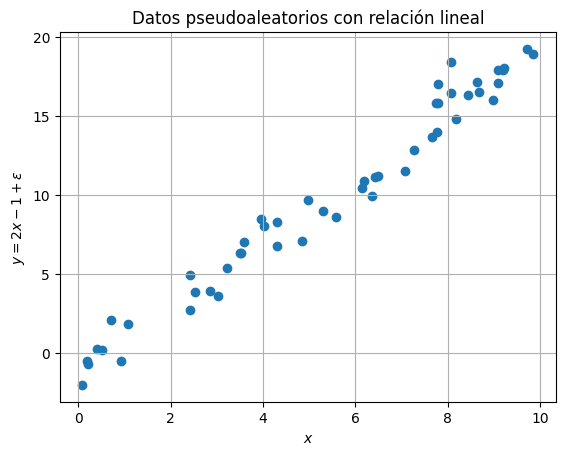

In [6]:
#generamos datos aleatorios para la prueba
import matplotlib.pyplot as plt

#fijamos una semilla para los datos pseudoaleatorios
rng = np.random.RandomState(55)

#generamos la variable independiente x
x = 10 * rng.rand(50)

#generamos la variable dependiente y
y = 2 * x - 1 + rng.randn(50)

#graficamos la información
plt.scatter(x,y)
plt.grid()
plt.title("Datos pseudoaleatorios con relación lineal")
plt.xlabel("$x$")
plt.ylabel("$y = 2x - 1 + \epsilon$")
plt.show()

1. Elegir una clase de modelo.

En nuestro caso elegiremos la regresión lineal simple

In [7]:
from sklearn.linear_model import LinearRegression

2. Elegir los hiperparámetros del modelo

In [8]:
#Para los hiperparámetros solamente vamos a elegir que ajuste el intercepto

#Instanciamiento del modelo
model =  LinearRegression(fit_intercept=True)

3. Organizar los datos en una matriz de características

In [9]:
#revisamos las dimensiones de x
x.shape

(50,)

In [10]:
#agregamos una dimensión en las columnas
X = x[:, np.newaxis]
X.shape

(50, 1)

In [ ]:
#revisamos las dimensiones de y
y.shape

(50,)

4. Ajustar el modelo

In [ ]:
#Entrenamos el modeo
model.fit(X,y)


LinearRegression()

In [ ]:
#revisión los parámetros del modelo
model.coef_
model.intercept_

-1.228112994208125

5. Predecir etiquetas para datos desconocidos

In [ ]:
#generamos los datos de test (datos desconocidos)
xfit = np.linspace(-1,11) #crea un vector de datos linealmente espaciados

#ajustamos la dimensión para que se ajuste a la matriz de características
xfit = xfit[:, np.newaxis]

#hacemos la predicción de los datos nuevos
yfit = model.predict(xfit)


Finalmente, visualizamos los resultados

<function matplotlib.pyplot.show(close=None, block=None)>

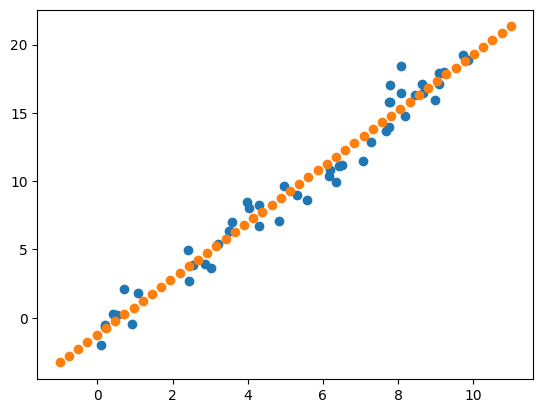

In [ ]:
#primero graficamos los datos sin procesar y luego el ajuste
plt.scatter(x,y)
plt.scatter(xfit, yfit)
plt.show

##Ejercicio

1. Cargue el archivo `california_housing_train.csv`
2. Se va a implementar un modelo de aprendizaje de máquina de represión lineal para predecir la variable `median_house_value`. Genere las estadísticas descriptivas, el histograma y el diagrama de cajas y bigotes de esta variable y analice esta información.
3. Elimine las muestras del dataset en las cuales esta variable sea un outlier, de acuerdo con el boxplot (por cuantiles). Vuelva a generar las estadísticas descriptivas de esta variables y a graficar el histograma y el boxplot ya sin datos atípicos.
4. Vamos a usar como variable predictora `median_house`. Haga un gráfico de despersión `median_house_value`versus `median_income`y analícelo. ¿Qué concluye?
5. Haga la matriz de características $X$ y la matriz objetco $y$.
6. Cree un modelo de regresión lineal con parámetro `fit_intercep = True`
7. Entrene el modelo. Muestre los parámetros del modelo. Calcule el `score`del modelo. ¿Qué tan bueno es el modelo?
8. En un gráfico de dispersión muestre las predicciones del modeo junto con los valores reales. ¿Qué puede observar?
9. Ahora vamos a ver qué tan bueno es el modelo con datos nuevos. Cargue el archivo el archivo `california_housing_test.csv`Genere las matrices de características objetivo respectivamente y calcule el score. ¿Qué puede observar?
10. Ahora haga predicciones sobre los datos nuevos y en un gráficode dispersión muestre las predicciones junto con los valores reales de $y$.
¿Qué concluye?

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Aprendizaje Supervisado/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df["median_house_value"].describe()

,median_house_value
count,17000.000000
mean,207300.912353
std,115983.764387
min,14999.000000
25%,119400.000000
50%,180400.000000
75%,265000.000000
max,500001.000000


<Axes: >

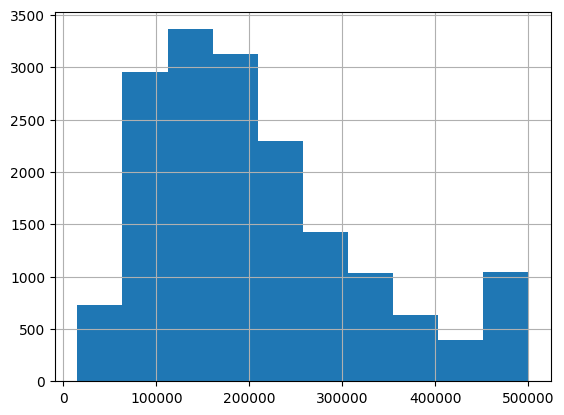

In [ ]:
df["median_house_value"].hist()

<Axes: >

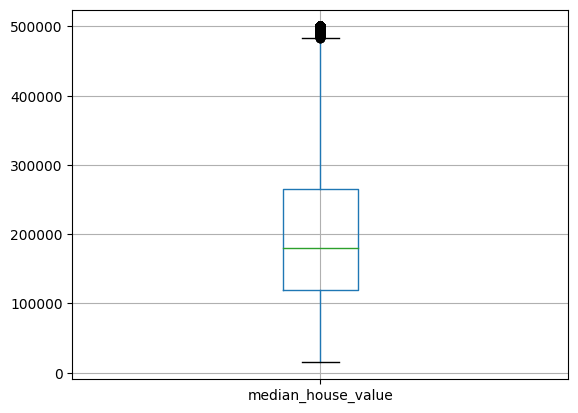

In [ ]:
df.boxplot(column="median_house_value")

In [ ]:
Q1 = df["median_house_value"].quantile(0.25) #cuartil 1
Q3 = df["median_house_value"].quantile(0.75) #cuartil 3
IQR = Q3 - Q1 #Rango intercuartirl

#Límite superior
upper_limit = 1.5 * IQR + Q3

#Límite inferior
lower_limit = Q1 - 1.5 * IQR

#filtramos todo lo que esté por encima del límite superior y todo lo que esté por debajo del límite interior
df_sin_outliers = df[(df["median_house_value"] < upper_limit) & (df["median_house_value"] > lower_limit)]

<Axes: >

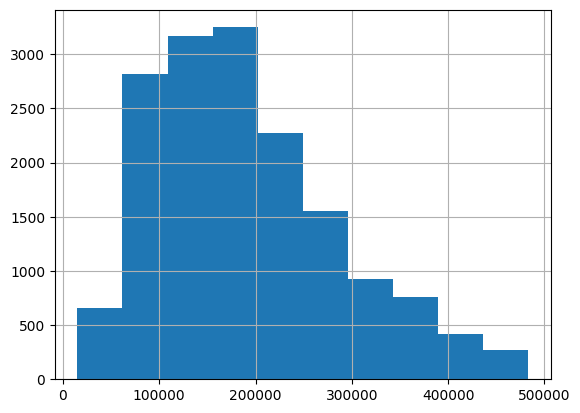

In [ ]:
df_sin_outliers["median_house_value"].hist()

<Axes: >

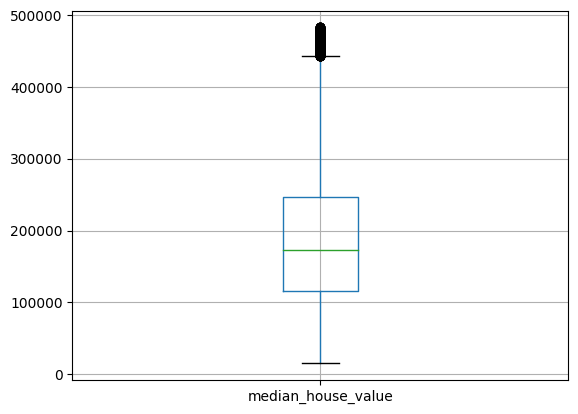

In [ ]:
df_sin_outliers.boxplot(column="median_house_value")